# LetsGrowMore(LGMVIP)- "DATA SCIENCE INTERN "

## LGMVIP April-22

## Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

## SEMANTO GHOSH

### Link for the dataset: ###
https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as po
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option("display.max_column",None)
pd.set_option("display.max_row",None)
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

## Load the dataset

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
df=data.copy()

In [4]:
df.shape

(2035, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


## Handling Null value

In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

## Data Visualization

In [8]:
corr=df.corr()

<AxesSubplot:>

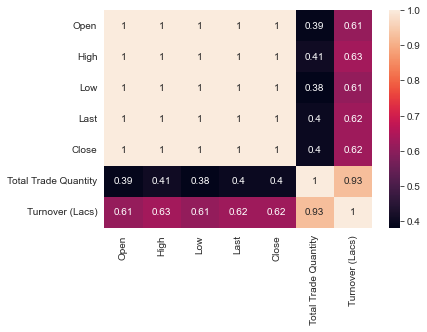

In [9]:
sns.heatmap(corr, annot = True)

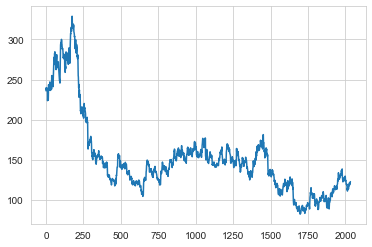

In [10]:
plt.plot(df['High'])

In [11]:
df.Date = pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']
df.drop('Date', axis = 1,inplace = True)
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


LSTM are sensitive to the scale of the data so we apply MinMax scaler

In [12]:
df_high=df.reset_index()['High']

In [13]:
df_high

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
5       237.00
6       237.20
7       239.25
8       238.00
9       236.70
10      223.70
11      225.40
12      235.15
13      224.50
14      225.00
15      224.60
16      238.20
17      243.55
18      239.75
19      237.30
20      237.70
21      239.30
22      239.35
23      237.20
24      240.60
25      246.90
26      247.00
27      244.50
28      242.00
29      238.50
30      236.45
31      237.95
32      239.85
33      240.50
34      241.55
35      240.45
36      239.00
37      238.05
38      254.95
39      249.65
40      247.00
41      243.95
42      242.95
43      248.50
44      249.20
45      244.25
46      240.95
47      243.30
48      249.60
49      251.85
50      257.90
51      265.75
52      272.45
53      275.45
54      277.80
55      276.20
56      273.25
57      282.40
58      281.00
59      284.50
60      273.10
61      270.15
62      268.25
63      268.40
64      269.70
65      266.95
66      26

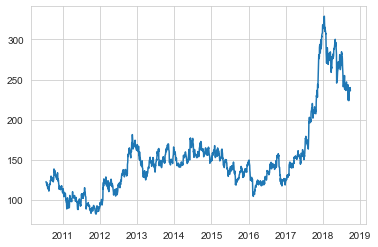

In [14]:
plt.plot(df['High'])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_high=scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [16]:
print(df_high)

[[0.62268754]
 [0.62614353]
 [0.6391543 ]
 ...
 [0.15917869]
 [0.15938199]
 [0.16344786]]


**Data Splitting**

In [17]:
training_size=int(len(df_high)*0.75)
test_size=len(df_high)-training_size
train_data,test_data=df_high[0:training_size,:],df_high[training_size:len(df_high),:1]

In [18]:
training_size,test_size

(1526, 509)

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

In [22]:
print(X_test.shape), print(y_test.shape)

(408, 100)
(408,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Creating a LSTM model

In [24]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 10s 222ms/step - loss: 0.0176 - val_loss: 0.0061
Epoch 2/100
23/23 [==============================] - 4s 157ms/step - loss: 0.0024 - val_loss: 6.8323e-04
Epoch 3/100
23/23 [==============================] - 4s 164ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/100
23/23 [==============================] - 4s 171ms/step - loss: 0.0014 - val_loss: 9.7439e-04
Epoch 5/100
23/23 [==============================] - 4s 161ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 3s 151ms/step - loss: 0.0012 - val_loss: 9.9449e-04
Epoch 7/100
23/23 [==============================] - 4s 169ms/step - loss: 0.0012 - val_loss: 9.0309e-04
Epoch 8/100
23/23 [==============================] - 4s 150ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/100
23/23 [==============================] - 5s 198ms/step - loss: 9.8990e-04 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 4s 170ms/step - 

## Predictions

In [28]:
# Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
#Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Model Evaluation

In [30]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

167.4968496281359

In [31]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

108.62321657122871

## Plot the results

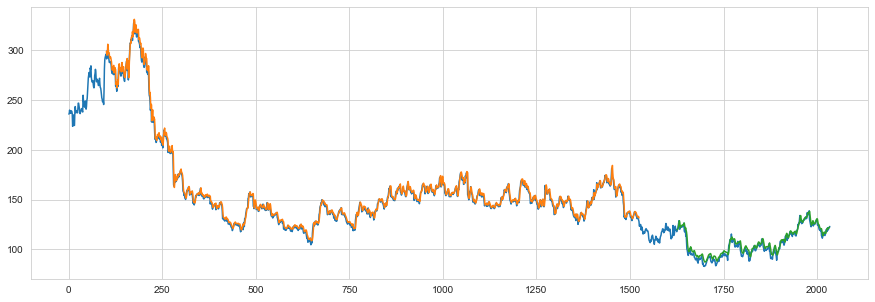

In [32]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Making predictions for next 10 days

In [33]:
len(test_data)

509

In [34]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape

(1, 100)

In [35]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [36]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.16628446]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
df_new = df_high.tolist()
df_new.extend(lst_output)

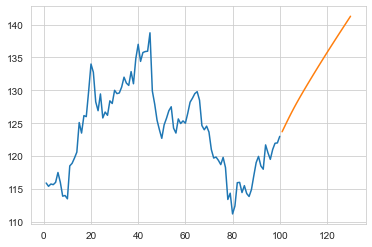

In [39]:
plt.plot(day_new,scaler.inverse_transform(df_high[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

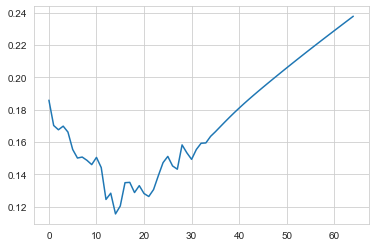

In [40]:
df_new = df_high.tolist()
df_new.extend(lst_output)
plt.plot(df_new[2000:])

In [41]:
df_new = scaler.inverse_transform(df_new).tolist()

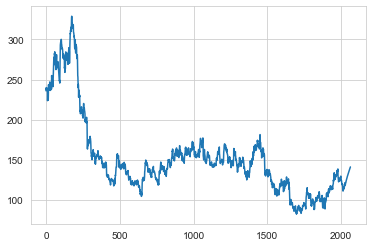

In [42]:
plt.plot(df_new)

## Thank You